In [1]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl/")
using LadderDGA
using Plots, LaTeXStrings

  Activating project at `~/Codes/LadderDGA.jl`


In [2]:
# Fd -> +U
# Fm -> -U

In [3]:
sampling = LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.cPnn, 2, 8)
kGrid_f = map(v -> LadderDGA.Dispersions.basis_transform(LadderDGA.Dispersions.cP,  v), sampling)
show(stdout, "text/plain", kGrid_f)

k0 = findfirst(k -> all(k .≈ 0), kGrid_f)
println("\nk0 = $k0, isnothing = ", isnothing(k0))

8×8 Matrix{Tuple{Float64, Float64}}:
 (-2.35619, -2.35619)   (-2.35619, -1.5708)   (-2.35619, -0.785398)   (-2.35619, 0.0)   (-2.35619, 0.785398)   (-2.35619, 1.5708)   (-2.35619, 2.35619)   (-2.35619, 3.14159)
 (-1.5708, -2.35619)    (-1.5708, -1.5708)    (-1.5708, -0.785398)    (-1.5708, 0.0)    (-1.5708, 0.785398)    (-1.5708, 1.5708)    (-1.5708, 2.35619)    (-1.5708, 3.14159)
 (-0.785398, -2.35619)  (-0.785398, -1.5708)  (-0.785398, -0.785398)  (-0.785398, 0.0)  (-0.785398, 0.785398)  (-0.785398, 1.5708)  (-0.785398, 2.35619)  (-0.785398, 3.14159)
 (0.0, -2.35619)        (0.0, -1.5708)        (0.0, -0.785398)        (0.0, 0.0)        (0.0, 0.785398)        (0.0, 1.5708)        (0.0, 2.35619)        (0.0, 3.14159)
 (0.785398, -2.35619)   (0.785398, -1.5708)   (0.785398, -0.785398)   (0.785398, 0.0)   (0.785398, 0.785398)   (0.785398, 1.5708)   (0.785398, 2.35619)   (0.785398, 3.14159)
 (1.5708, -2.35619)     (1.5708, -1.5708)     (1.5708, -0.785398)     (1.5708, 0.0)     (1.5708, 0

In [4]:
#cfg = "/home/julisn/Codes/lDGA_pp_test/tp0_50_s1_U2.0_b5.0_mu1.0/config.toml"
#cfg = "/home/julisn/Codes/lDGA_pp_test/test_2/config.toml"
cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s0_U2.0_b5.0_mu1.0/config.toml"
#cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s1_U2.0_b5.0_mu1.0/config.toml"

wp, mP, sP, env, kGridsStr = readConfig(cfg)
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env)
lDGAhelper_Ur = deepcopy(lDGAhelper)
lDGAhelper_Ur.Γ_m[:,:,:] = lDGAhelper_Ur.Γ_m[:,:,:] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
lDGAhelper_Ur.Γ_d[:,:,:] = lDGAhelper_Ur.Γ_d[:,:,:] .- ( lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)

bubble     = calc_bubble(:DMFT, lDGAhelper);
bubble_pp  = calc_bubble(:DMFT, lDGAhelper; mode=:pp);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.2-0.1 of size 4
WARNING!!! k-grid sampling must contain zero-vector in order for convolutions to work!
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(3:99) = 0.4075, χLoc_d(3:99) = 0.0925
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2483152624470974 ?=? 0.24999862492097769 ?≈? 0.24999862492097769 ≟ 0.24999268986197437"


In [5]:
χm, γm = calc_χγ(:m, lDGAhelper, bubble);
χd, γd = calc_χγ(:d, lDGAhelper, bubble);
#λ₀ = calc_λ0(bubble, lDGAhelper)
#Σ_ladder = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.017694054618 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.013193827053 ≟ 0


In [6]:
χm_star, γm_star = calc_χγ(:m, lDGAhelper_Ur, bubble)
χd_star, γd_star = calc_χγ(:d, lDGAhelper_Ur, bubble);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.025966602242 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.005122030844 ≟ 0


# Matrix identity for difference between chi and chi^star


Let A and (A+B) be invertible matrices and rank(B) = 1. Then (see lDGA numerics):

$(A+B)^{-1} = A^{-1} - \frac{1}{1+g} A^{-1} B A^{-1}$ and $g = Tr(B A^{1}) \neq 1$



In [7]:
using LinearAlgebra
@time χm_gen      = calc_gen_χ(lDGAhelper.Γ_m,    bubble, lDGAhelper.kG);
@time χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG);
@time χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG);

  0.414322 seconds (100.12 k allocations: 284.324 MiB, 4.41% gc time, 27.88% compilation time)
  0.339128 seconds (4.25 k allocations: 277.934 MiB, 3.64% gc time)
  0.408264 seconds (4.25 k allocations: 277.934 MiB, 2.18% gc time)


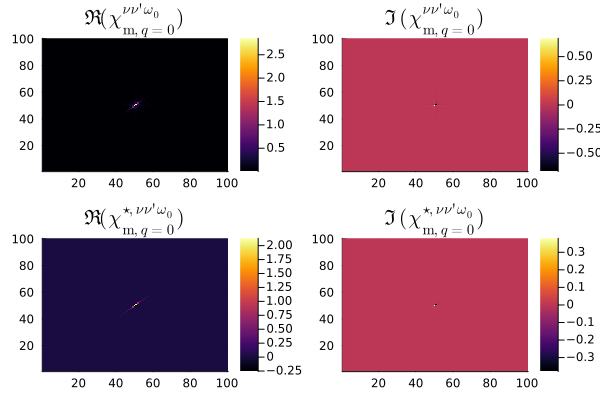

In [8]:
p1 = heatmap(real.(χm_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p2 = heatmap(imag.(χm_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p3 = heatmap(real.(χm_star_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p4 = heatmap(imag.(χm_star_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")

plot(p1, p2, p3, p4)

# Calculation of F_r

??????

$ \gamma^{\nu\omega}_{m/d,q} = \beta (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}\sum \chi^{\star,\nu\nu'\omega}_{m/d,q} \pm 1 $ 


$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1} 
            -  \beta^2 (\chi^{\nu\omega}_0)^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_0)^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \sum_{\nu_1\nu_2}\chi^{*,\nu\nu_1\omega}_{r,\mathbf{q}} \chi^{*,\nu_2\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} $

### pm 1 missing?? 
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = 
            \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}
            -  \beta^2 (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\gamma^{\nu\omega}_r \mp 1) (\gamma^{\nu'\omega}_r \mp 1) $
        
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} =
        \beta^2 \left( \chi^{\nu\nu'\omega}_{0,\mathbf{q}} \right)^{-1} 
        +  \beta^2 \left( \chi^{\nu\omega}_{0,\mathbf{q}} \right)^{-1}  \chi^{\nu\nu'\omega}_{r,\mathbf{q}} \left( \chi^{\nu'\omega}_{0,\mathbf{q}} \right)^{-1} $

In [9]:
function core(χ₀::χ₀T)
    view(χ₀.data, :,χ₀.ν_shell_size+1:size(χ₀.data,2)-χ₀.ν_shell_size,:)
end

function F_from_χ_star_gen(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in axes(χstar_r,4)
        for qi in axes(χstar_r,3)
            pre_factor = Ur * (1 - Ur * χr[qi,ωi])
            for νpi in axes(χstar_r,2)
                @simd for νi in axes(χstar_r,1)
                    @inbounds F[νi,νpi,qi,ωi]  = -χ₀.β^2 * χstar_r[νi,νpi,qi,ωi] / (core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                    @inbounds F[νi,νpi,qi,ωi] +=  pre_factor * γr[qi,νi,ωi] * γr[qi,νpi,ωi]
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_r_test(χ₀::χ₀T, χr)
    F = -deepcopy(χr)
    for ωi in 1:size(χm_gen,4)
        for qi in 1:size(χm_gen,3)
            for νpi in 1:size(χm_gen,2)
                for νi in 1:size(χm_gen,1)
                    F[νi,νpi,qi,ωi] = χ₀.β^2 .* F[νi,νpi,qi,ωi]/(core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_from_χ_star_gen_test(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in 1:size(χstar_r,4)
        for qi in 1:size(χstar_r,3)
            F[:,:,qi,ωi] = Diagonal(χ₀.β^2 ./ core(χ₀)[qi,:,ωi]) .- χ₀.β^2 .* χstar_r[:,:,qi,ωi] ./ (core(χ₀)[qi,:,ωi] .* transpose(core(χ₀)[qi,:,ωi]))
            F[:,:,qi,ωi] +=  Ur * (1 - Ur * χr[qi,ωi]) .* ((γr[qi,:,ωi]) .* transpose(γr[qi,:,ωi]))
        end
    end
    return F
end

F_from_χ_star_gen_test (generic function with 1 method)

In [10]:
@time F_m_test1 = F_r_test(bubble, χm_gen);

  5.898341 seconds (61.40 M allocations: 1.932 GiB, 3.97% gc time, 5.59% compilation time)


In [11]:
@time F_m_test2 = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);
@time F_d_test2 = F_from_χ_star_gen(bubble, χd_star_gen, χd, γd, lDGAhelper.mP.U);

  0.154455 seconds (6 allocations: 92.468 MiB)
  0.166097 seconds (5 allocations: 92.468 MiB, 6.11% gc time)


In [12]:
@time F_m_test3 = F_from_χ_star_gen_test(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);

  0.327686 seconds (10.91 k allocations: 561.273 MiB, 5.98% gc time)


In [13]:
test1 = sum(abs.(F_m_test1 .- F_m_test2)) / sum(abs.(F_m_test1))
tt = findmax(abs.(F_m_test1 .- F_m_test2))
test2 = sum(abs.(F_m_test2 .- F_m_test3))
println("$test1, $test2 /// max diff : " , tt) 

0.011735906554855801, 1.8761042055957377e-8 /// max diff : (0.06608482003468454, CartesianIndex(51, 51, 1, 50))


lim: -1.999454714392024 ?=? -2.0


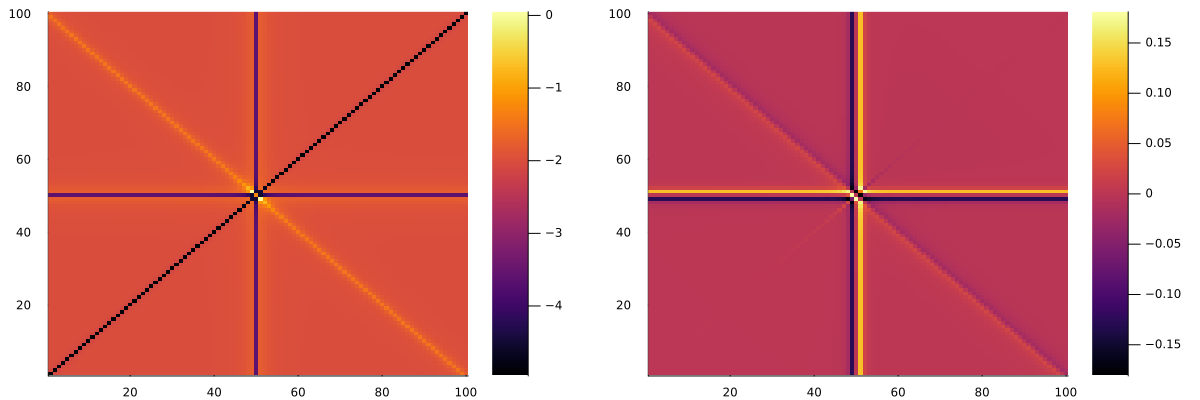

In [14]:
ωi = 52
qi = 1
p1 = heatmap(real(F_m_test1[:,:,qi,ωi]), titel="Re Test1")
p2 = heatmap(imag(F_m_test1[:,:,qi,ωi]), titel="Im Test1")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.999454714392024 ?=? -2.0


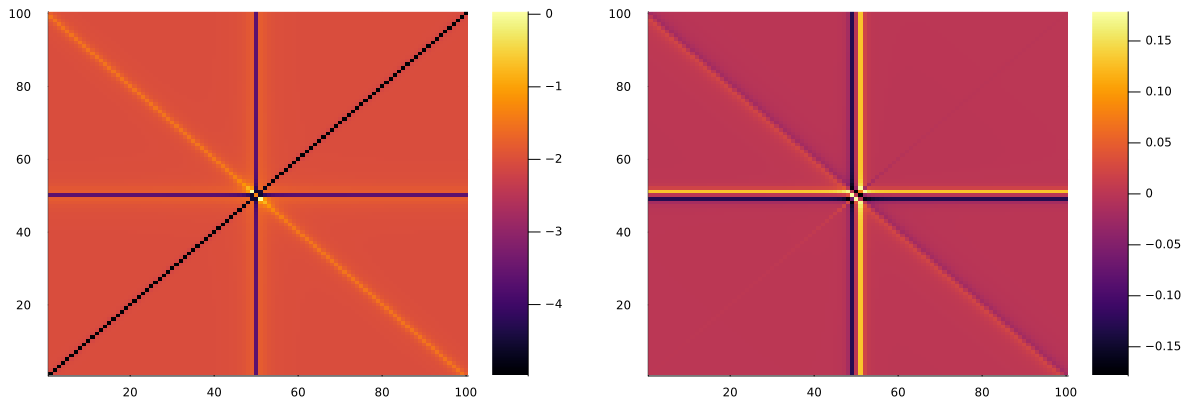

In [15]:
p1 = heatmap(real(F_m_test2[:,:,qi,ωi]), titel="Re Test4")
p2 = heatmap(imag(F_m_test2[:,:,qi,ωi]), titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.999454714392024 ?=? -2.0


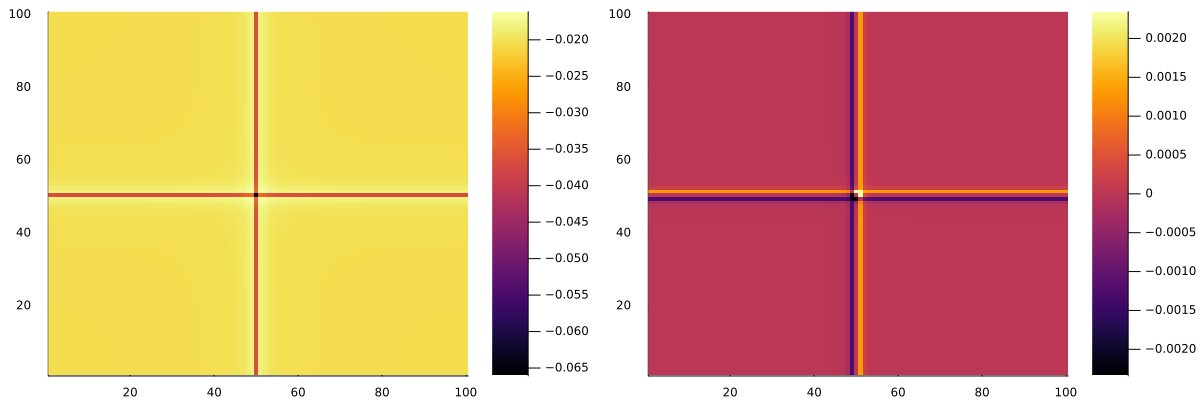

In [16]:
p1 = heatmap(real(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Re Test4")
p2 = heatmap(imag(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -2.0379329793650736


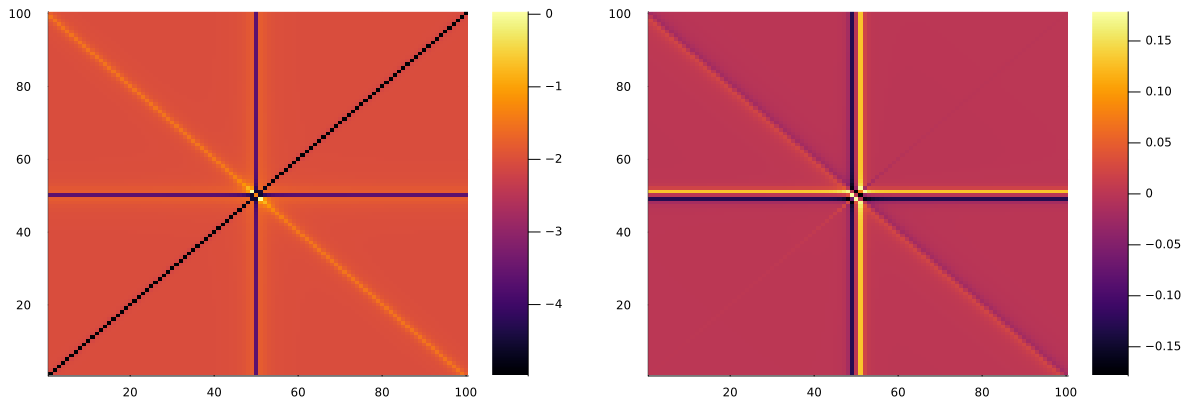

In [17]:
p1 = heatmap(real(F_m_test3[:,:,qi,ωi]), titel="Re Test3")
p2 = heatmap(imag(F_m_test3[:,:,qi,ωi]), titel="Im Test3")
println("lim: ", real(F_m_test3[1,12,qi,ωi]))
plot(p1, p2, size=(1200,400))

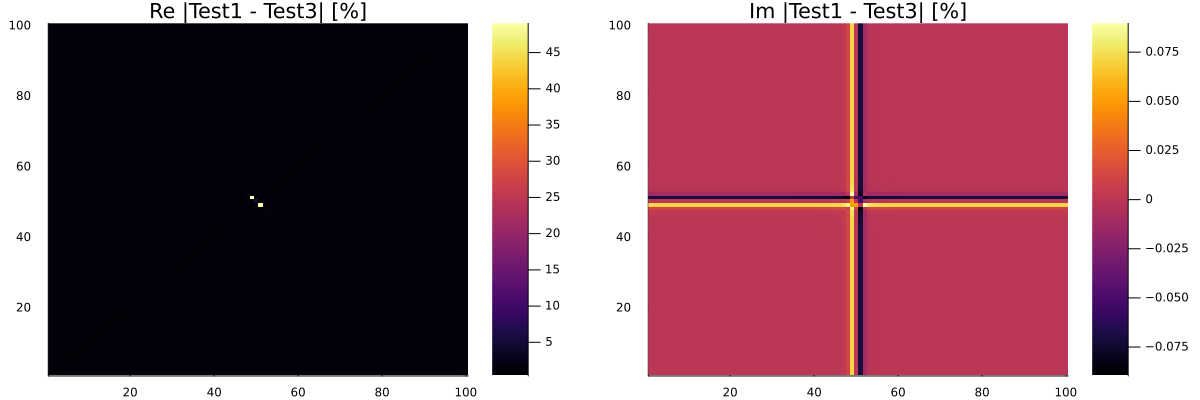

In [18]:
p1 = heatmap(100 .* real(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3| [%]")
p2 = heatmap(100 .* imag(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3| [%]")
plot(p1, p2, size=(1200,400))

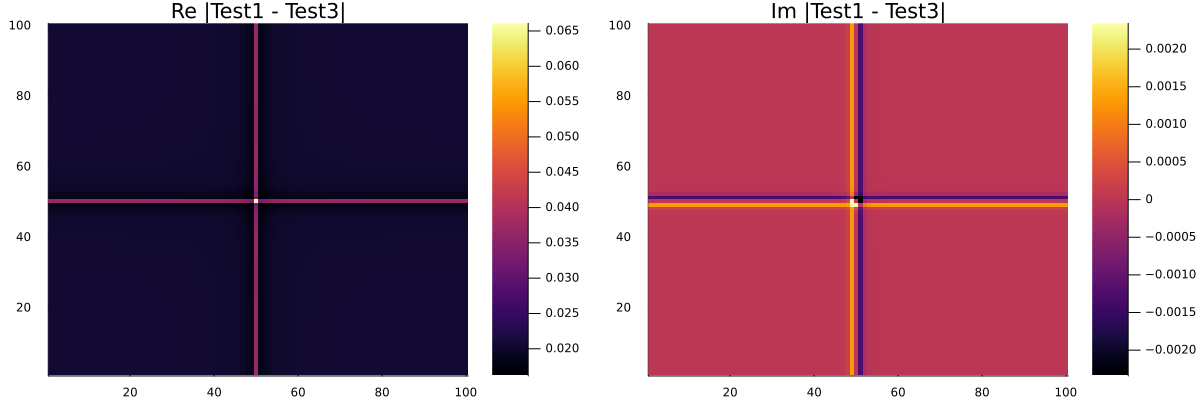

In [19]:
p1 = heatmap(real(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3|")
p2 = heatmap(imag(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3|")
plot(p1, p2, size=(1200,400))

In [20]:
F_m_loc = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);
F_d_loc = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);

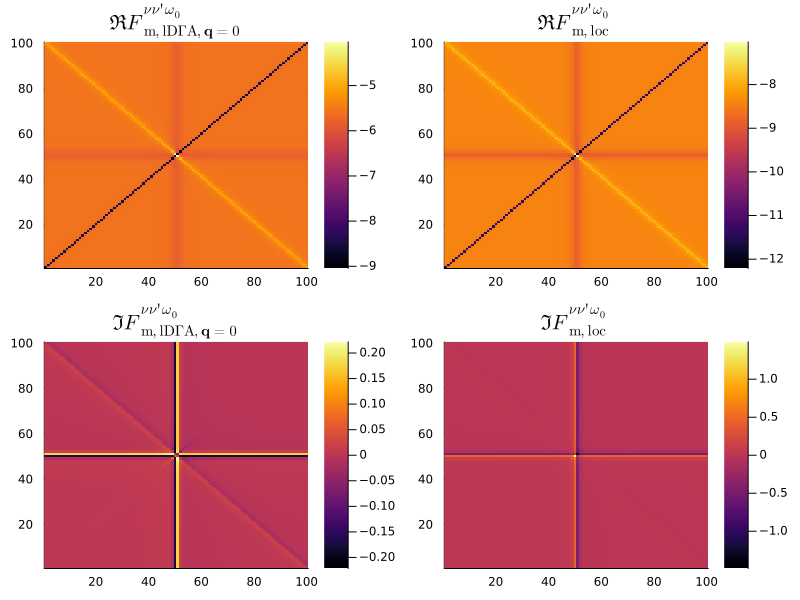

In [21]:
ωi = 51

ωn = (-lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω)[ωi]
p1 = heatmap(real(F_m_test2[:,:,1,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p2 = heatmap(real(F_m_loc[:,:,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
p3 = heatmap(imag(F_m_test2[:,:,1,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p4 = heatmap(imag(F_m_loc[:,:,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
plot(p1, p2, p3, p4, size=(800,600))

## F_r asympt checks

In [22]:
U = lDGAhelper.mP.U
β = lDGAhelper.mP.β
qi = 4
ω0 = lDGAhelper.sP.n_iω+1


χ_d_asympt = lDGAhelper.sP.χ_helper.χch_asympt
χ_m_asympt = lDGAhelper.sP.χ_helper.χsp_asympt
χ_pp_asympt = lDGAhelper.sP.χ_helper.χpp_asympt

Γd_lim_diag =  U + U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] 
Γm_lim_diag = -U + U^2/2 * χ_d_asympt[1] - 0.5 * U^2 * χ_m_asympt[1]
Γs_lim_diag = 2U - U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1]
Γt_lim_diag =    + U^2/2 * χ_d_asympt[1] + 0.5 * U^2 * χ_m_asympt[1];

Γd_lim_bg =  U
Γm_lim_bg = -U
Γs_lim_bg = 2U
Γt_lim_bg = 0.0;


Fd_lim_diag =  U + U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] - 1 * U^2 * χ_d_asympt[1]
Fm_lim_diag = -U + U^2/2 * χ_d_asympt[1] - 0.5 * U^2 * χ_m_asympt[1] - 1 * U^2 * χ_m_asympt[1]
Fs_lim_diag = 2U - U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_diag =      U^2/2 * χ_d_asympt[1] + 0.5 * U^2 * χ_m_asympt[1] ;

Fd_lim_bg =  U - 1 * U^2 * χ_d_asympt[1]
Fm_lim_bg = -U - 1 * U^2 * χ_m_asympt[1]
Fs_lim_bg = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg = 0.0;

Fd_lim_bg_nl =  U - 1 * U^2 * χd[qi,ω0]
Fm_lim_bg_nl = -U - 1 * U^2 * χm[qi,ω0]
Fs_lim_bg_nl = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg_nl = 0.0;

Fd_bg_diff = Fd_lim_bg_nl - Fd_lim_bg 
Fm_bg_diff = Fm_lim_bg_nl - Fm_lim_bg 
Fs_bg_diff = Fs_lim_bg_nl - Fs_lim_bg 
Ft_bg_diff = Ft_lim_bg_nl - Ft_lim_bg

Fd_lim_diag_nl = Fd_lim_diag + Fd_bg_diff # U + U^2/2 * χd[qi,ω0] + 1.5 * U^2 * χm[qi,ω0] - 1 * U^2 * χd[qi,ω0]      - Fd_bg_diff
Fm_lim_diag_nl = Fm_lim_diag + Fm_bg_diff #-U + U^2/2 * χd[qi,ω0] - 0.5 * U^2 * χm[qi,ω0] - 1 * U^2 * χm[qi,ω0]      - Fm_bg_diff
Fs_lim_diag_nl = Fs_lim_diag + Fs_bg_diff #2U - U^2/2 * χd[qi,ω0] + 1.5 * U^2 * χm[qi,ω0] - 2 * U^2 * χ_pp_asympt[1] - Fs_bg_diff
Ft_lim_diag_nl = Ft_lim_diag + Ft_bg_diff #     U^2/2 * χd[qi,ω0] + 0.5 * U^2 * χm[qi,ω0] - Ft_bg_diff;

Fd_lim_bg_nl_int = kintegrate(lDGAhelper.kG,  U .- 1 .* U^2 .* χd[:,ω0],1)[1]
Fm_lim_bg_nl_int = kintegrate(lDGAhelper.kG, -U .- 1 .* U^2 .* χm[:,ω0],1)[1]
Fs_lim_bg_nl_int = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg_nl_int = 0.0;

Fd_bg_int_diff = Fd_lim_bg_nl_int - Fd_lim_bg
Fm_bg_int_diff = Fm_lim_bg_nl_int - Fm_lim_bg
Fs_bg_int_diff = Fs_lim_bg_nl_int - Fs_lim_bg
Ft_bg_int_diff = Ft_lim_bg_nl_int - Ft_lim_bg

Fd_lim_diag_nl_int = Fd_lim_diag+ Fd_bg_int_diff
Fm_lim_diag_nl_int = Fm_lim_diag + Fm_bg_int_diff
Fs_lim_diag_nl_int = Fs_lim_diag + Fs_bg_int_diff
Ft_lim_diag_nl_int = Ft_lim_diag + Ft_bg_int_diff;

In [23]:
# - compensates global -1 factor in script

function format_out(val, lim; digits=5, atol=1e-1)
    lim_s = lpad(rpad(round(real(lim),digits=digits), 6, "0"),10, " ")
    val_s = lpad(rpad(round(real(val),digits=digits), 6, "0"),10, " ")
    sim = isapprox(val, lim, atol=atol) ? "\e[1m\e[38;2;0;150;50;249m✓\x1b[0m" :  "\e[1m\e[38;2;250;0;0;249m↯\x1b[0m"
    return "$val_s ≟ $lim_s  " * sim
end

F_m_loc_internal   = F_from_χ(:m, lDGAhelper);
F_d_loc_internal   = F_from_χ(:d, lDGAhelper);


nBose = lDGAhelper.sP.n_iω
ω0_ind = nBose + 1
nan_ind = trunc(Int,nBose/2+10)

F_m_kint = kintegrate(lDGAhelper.kG, F_m_test2, 3)[:,:,1,:]
#testlist = [("direct qi=$qi", F_m_test1[:,:,qi,:]) for qi in 1:size(F_m_test3,3)]
testlist = [("∫F dk ",F_m_kint, :m_nl_int), ("Fm_loc ", F_m_loc, :m_loc), ("Fd_loc ", F_d_loc, :d_loc), ("Fm_loc2", F_m_loc_internal, :m_loc), ("Fd_loc2", F_d_loc_internal, :d_loc), ("Fd_q  ", F_d_test2[:,:,qi,:], :d_nl),("Fm_q  ",F_m_test1[:,:,qi,:], :m_nl),("Fm_q 2",F_m_test2[:,:,qi,:], :m_nl),("Fm_q 3",F_m_test3[:,:,qi,:], :m_nl)]
println("                               numerical ≟ exact (q = $(round.(lDGAhelper.kG.kGrid[qi], digits=2)))")
println("   ================ Fm ==================   ")
for (name, val, t) in testlist
    if t == :m_nl 
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag_nl))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg_nl))")
    elseif t == :d_nl
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fd_lim_diag_nl))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fd_lim_bg_nl))")
    elseif t == :m_nl_int
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag_nl_int))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg_nl_int))")
    elseif t == :m_loc
        println("Diagonal $name   (loc)  :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag))")
        println("Background $name (loc)  :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg))")
    elseif t == :d_loc
        println("Diagonal $name   (loc)  :   $(format_out(val[1,1,nBose+1] , Fd_lim_diag))")
        println("Background $name (loc)  :   $(format_out(val[30,1,nBose+1], Fd_lim_bg))")
    else
        println("ERROR, key $t not found!!")
    end
end

                               numerical ≟ exact (q = (3.14, 0.0))
   ================ Fm ==================   
Diagonal ∫F dk    (nl)    :    -10.69559 ≟  -10.67474  ✓
Background ∫F dk  (nl)    :     -7.75206 ≟   -7.72942  ✓
Diagonal Fm_loc    (loc)  :    -11.36574 ≟  -11.36543  ✓
Background Fm_loc  (loc)  :     -8.42241 ≟   -8.42011  ✓
Diagonal Fd_loc    (loc)  :     11.36366 ≟   11.36543  ✓
Background Fd_loc  (loc)  :      1.46525 ≟    1.47052  ✓
Diagonal Fm_loc2   (loc)  :    -11.36574 ≟  -11.36543  ✓
Background Fm_loc2 (loc)  :     -8.42241 ≟   -8.42011  ✓
Diagonal Fd_loc2   (loc)  :     11.36366 ≟   11.36543  ✓
Background Fd_loc2 (loc)  :      1.46525 ≟    1.47052  ✓
Diagonal Fd_q     (nl)    :     11.34808 ≟   11.36995  ✓
Background Fd_q   (nl)    :      1.44973 ≟    1.47505  ✓
Diagonal Fm_q     (nl)    :     -10.4776 ≟   -10.4774  ✓
Background Fm_q   (nl)    :       -7.534 ≟   -7.53209  ✓
Diagonal Fm_q 2   (nl)    :    -10.49822 ≟   -10.4774  ✓
Background Fm_q 2 (nl)    :     -

## Matsuabra Frequencies Checks

$\nu_n + \nu_l = \frac{\pi}{\beta} \left( 2n + 1 + 2l + 1 \right) = \frac{\pi}{\beta} \left( 2(n+l + 1) \right) = \omega_{m+1}, \qquad m = n+l$

$\nu_n - \nu_l = \frac{\pi}{\beta} \left( 2n + 1 - 2l - 1 \right) = \frac{\pi}{\beta} \left( 2(n-l + 0) \right) = \omega_{m}, \qquad m = n-l$

$\omega_m \pm \omega_k = \frac{\pi}{\beta} \left( 2m \pm 2k \right) = \frac{\pi}{\beta} \left( 2(m \pm k) \right) = \omega_{r}, \qquad r = m \pm k$

$\omega_m + \nu_n = \frac{\pi}{\beta} \left( 2m + 2n + 1 \right) = \frac{\pi}{\beta} \left( 2(m+n) + 1 \right) = \omega_{l}, \qquad l = m+n$

$\omega_m - \nu_n = \frac{\pi}{\beta} \left( 2m - 2n - 1 \right) = \frac{\pi}{\beta} \left( 2(m-n) - 1 \right) = \frac{\pi}{\beta} \left( 2(m-n-1) + 1 \right) =  \omega_{l-1}, \qquad l = m-n$

# Calculation of F_ladder

## F_ladder in pp notation

$  F^{\nu\nu'\omega}_{\mathrm{ladder}, kk'q} =  \frac{1}{2} \left(
            F^{\lambda,\nu\nu'\omega}_{\mathrm{d},q}
            - F^{\lambda,\nu\nu'\omega}_{\mathrm{m},q} 
        \right) 
        - F^{\lambda,\nu(\omega+\nu)(\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow} $

## K-Grid sub-sampling

In [24]:
function find_non_nan_matrix(data::Matrix, nFermi::Int)
    nan_list       = sort(map(x->x[1],filter(x->x[1] == x[2], findall(x-> !isnan(x), data))))
    nh = searchsorted(nan_list, nFermi)
    res = if length(nh) == 1
        t1 = diff(nan_list[nh[1]:end])
        t2 = -1 * diff(nan_list[nh[1]:-1:1])
        lim_up = findfirst(x->x != 1, t1)
        lim_lo = findfirst(x->x != 1, t2)
        lim_up = isnothing(lim_up) ? length(t1) : lim_up
        lim_lo = isnothing(lim_lo) ? length(t2) : lim_lo
        lim_non_nan = min(lim_up, lim_lo)
        (nFermi-lim_non_nan):(nFermi+lim_non_nan)
    else
        []
    end
    return res
end

using JLD2
ϕs, ϕt = jldopen(joinpath(env.inputDir, "DMFT_out.jld2"),"r") do f
    f["Φpp_s"], f["Φpp_t"]
end;
ϕs = permutedims(ϕs, [2,3,1]);
ϕt = permutedims(ϕt, [2,3,1]);

ϕ_pp_ud = 0.5 .* (ϕs .+ ϕt);
ϕ_pp_ud2 = zeros(size(ϕ_pp_ud)); #0.5 .* (ϕs .+ ϕt);

In [25]:
expandKArr = LadderDGA.expandKArr
gridshape  = LadderDGA.gridshape

function getG_naive(kG, Σ, kp, νp, μ, β)
    ϵk = LadderDGA.Dispersions.gen_ϵkGrid(LadderDGA.Dispersions.grid_type(kG), [kp], kG.t, kG.tp, kG.tpp)[1]
    Σν = νp > -1 ? Σ[νp] : conj(Σ[-νp-1])
    Gk = 1/(1im * (2*νp+1)*π/β + μ - ϵk - Σν)
    return Gk
end

function GG_naive(kG, Σ, kp, νp, μ, β)
    Gk = getG_naive(kG, Σ, kp, νp, μ, β)
    G_minusk = getG_naive(kG, Σ, -1 .* kp, -νp-1, μ, β)
    #println(Gk, " ,", G_minusk)
    return Gk*G_minusk
end

function build_GG(kG, GF, νnGrid, k_vecs)
    res = Array{ComplexF64}(undef, length(νnGrid), length(k_vecs))

    for (νi,νn) in enumerate(νnGrid)
        GF_ν = expandKArr(kG, GF[:,νn].parent)
        GF_ν_minus_k_pre = expandKArr(kG, GF[:,-νn-1].parent)
        shift_vec = 2 .* kG.k0 .- gridshape(kG) .- 1
        GF_ν_minus_k = circshift(reverse(GF_ν_minus_k_pre), shift_vec)
        for (ki,k_vec) in enumerate(k_vecs)
            res[νi,ki] = GF_ν[ki]*GF_ν_minus_k[ki]
        end
    end
    return res
end


function build_q_access_kp_minus_k(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, kp_vec .- k_vec), digits=6)                   
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end
function build_q_access_minus_k_minus_kp(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, -1 .* k_vec .- kp_vec), digits=6) 
            q_vec = map(x-> x ≈ 0 ? 0.0 : x, q_vec)
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end

function build_q_access_k_minus_kp(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, k_vec .- kp_vec), digits=6) 
            q_vec = map(x-> x ≈ 0 ? 0.0 : x, q_vec)
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end

build_q_access_k_minus_kp (generic function with 1 method)

## Lin. Eliashberg Eq.

### TODO: NEU TEXEN
    - nu indices
    - pp bubble structure?

$  F^{\nu\nu'\omega}_{\mathrm{ladder,ph,\uparrow\downarrow}, kk'q} =  \frac{1}{2} \left(
            F^{\lambda,\nu\nu'\omega}_{\mathrm{d},q}
            - F^{\lambda,\nu\nu'\omega}_{\mathrm{m},q} 
        \right) 
        - F^{\lambda,\nu(\omega+\nu)(\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow} $

$ \Phi_{\uparrow\downarrow} = \frac{1}{2} (\Phi_\mathrm{s}  +\Phi_\mathrm{t})$

$  \Gamma^{\nu\nu'\omega}_{\mathrm{s},kk'q} := \Gamma^{\nu\nu'\omega}_{\mathrm{pp},\uparrow\downarrow,kk'q} 
    = 
        F^{\nu'(-\nu)(\nu-\nu')}_{\mathrm{ladder},k'(-k)(k-k')} 
        - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\mathrm{pp},\uparrow\downarrow,kk'q=0}  $
        
$\Gamma^{\nu\nu'\omega}_{s,kk'q} = \frac{1}{2} \left(
            F^{\lambda,\nu'(-\nu)(\nu-\nu')}_{\mathrm{d},k-k'}
            - F^{\lambda,\nu'(-\nu)(\nu-\nu')}_{\mathrm{m},k-k'} 
        \right) 
        - F^{\lambda,\nu'\nu(-\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu(-\nu)(\nu-\nu')}_{\mathrm{loc},\uparrow\downarrow} - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow}$

$ \lambda \Delta^{\nu}_{k} = -\frac{1}{\beta N_k} \sum_{\nu' k'} \Gamma^{\nu\nu'\omega=0}_{kk'q=0} \chi^{\nu'\omega_0}_{0,\mathrm{s},k'} \Delta^{\nu'}_{k'}$

In [26]:
build_kGrid_subsample = LadderDGA.build_kGrid_subsample
Dispersions = LadderDGA.Dispersions
grid_type = LadderDGA.grid_type
grid_dimension = LadderDGA.grid_dimension
build_q_access = LadderDGA.build_q_access
freq_inbounds = LadderDGA.freq_inbounds
_gen_inv_work_arr = LadderDGA._gen_inv_work_arr
inv! = LadderDGA.inv!
KGrid = LadderDGA.KGrid
OffsetMatrix = LadderDGA.OffsetMatrix

using JLD2


struct LinEliashbergEqHelper
    freqIndexArr_ph::Array{Tuple{Int64, Int64, Int64},2}
    νnGrid::AbstractVector{Int}
    kG::KGrid
    k_vecs
    sub_i::AbstractVector
    νlen::Int
    klen::Int

    Phi_ud_pp::Array{ComplexF64,2}
    F_ud_pp_loc::Array{ComplexF64,2}
    F_m_pre::Array{ComplexF64,3}
    F_d_pre::Array{ComplexF64,3}
    χ₀_ph::χ₀T
    qi_access::Matrix{Int}
end

function LinEliashbEqHelper_test1(χ₀_ph, Fm_loc, Fd_loc, h::lDΓAHelper; νmax::Int = trunc(Int, h.sP.n_iν/2)-1, max_Nk::Int=10)
    # ==== Definition of Variables ====
    (max_Nk > h.kG.Ns) && error("Upsampling for k-Grid not supported! Choose smaller max_Nk.")
    kG, sub_i = build_kGrid_subsample(h.kG, max_Nk)
    k_vecs = collect(Dispersions.gen_sampling(grid_type(kG), grid_dimension(kG), kG.Ns))[:]
    #collect(Dispersions.gen_sampling(grid_type(kG), grid_dimension(kG), kG.Ns))[1:end-1]

    Nq = length(kG.kMult)
    Nν = size(h.Γ_m, 1)
    νnGrid = -(νmax):(νmax-1)
    νlen = length(νnGrid)
    klen = length(k_vecs)
    ωn_pp = 0; 
    ωi_pp = h.sP.n_iω+1
    #Fm_loc = F_from_χ(:m, h);
    #Fd_loc = F_from_χ(:d, h);

    # ========= Preallocation =========
    freqIndexArr_ph = Array{Tuple{Int64, Int64, Int64},2}(undef, νlen, νlen)
    freqIndexArr_pp = Array{Tuple{Int64, Int64, Int64},2}(undef, νlen, νlen)
    Phi_ud          = Array{ComplexF64, 2}(undef, νlen, νlen)
    qi_access       = build_q_access_k_minus_kp(kG, k_vecs[:])
    
    #TODO: move this to IO
    Phi_s, Phi_t = jldopen(joinpath(env.inputDir, "DMFT_out.jld2"),"r") do f
        f["Φpp_s"], f["Φpp_t"]
    end;
    Phi_ud_pp = 0.5 .* (Phi_s[ωi_pp,:,:] .+ Phi_t[ωi_pp,:,:]);

    # ====== Build index_mapping ======
    # index_mapping containes (νn,νpn) for each ωn, necessary to build Γpp,ud from Fph,ud
    for (νi,νn) in enumerate(νnGrid)
        νi_pp  = νn + h.sP.n_iν+1;
        for (νpi,νpn) in enumerate(νnGrid)      
            ν_minus_νp = trunc(Int, (2*νn+1 - (2*νpn+1))/2)            # νn - νpn
            νp_minus_ν = trunc(Int, (2*νpn+1 - (2*νn+1))/2)            # νpn - νn
            minus_ν_minus_νp = - νn - νpn - 1                          # trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn
            minus_ν       = trunc(Int, -(2*νn+1)/2 - 1*(νn >= 0))
            minus_νp      = trunc(Int, -(2*νpn+1)/2 - 1*(νpn >= 0))
            ν_plus_νp  = νn + νpn + 1

            νpi_pp  = νpn + h.sP.n_iν+1;
            ωi_ladder, νi_ladder, νpi_ladder = Freq_to_OneToIndex(minus_ν_minus_νp, νn, νpn, h.sP.shift, h.sP.n_iω, h.sP.n_iν)
            if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,h.sP)
                freqIndexArr_ph[νi, νpi] = (νi_ladder,νpi_ladder,ωi_ladder)
                freqIndexArr_pp[νi, νpi] = (νi_pp, νpi_pp, ωi_pp)
            else
                error("Trying to build LinEliashbEqHelper for too large νnGrid!")
            end 
        end
    end

    # list of needed ω_ph indices
    ωi_list = sort(unique(map(x->x[3],freqIndexArr_ph)))

    # Dictionary mapping each ω_ph index to (ν-index,νp-index,i) where i is the (linear) index to the entry in freqIndexArr_ph
    index_mapping = Dict{Int, Vector{Tuple{Int,Int,Int}}}()
    
    for (i,el) in enumerate(freqIndexArr_ph)
        !haskey(index_mapping, el[3]) && (index_mapping[el[3]] = Tuple{Int,Int}[])
        push!(index_mapping[el[3]], (el[1],el[2],i))
    end

    # ===== Build χrstar_reduced ======
    χννpω_work = Matrix{ComplexF64}(undef, Nν, Nν)
    ipiv = Vector{Int}(undef, Nν)
    work = _gen_inv_work_arr(χννpω_work, ipiv)

    
    F_m_pre = similar(h.Γ_m, Nq, Nν, Nν)
    F_d_pre = similar(h.Γ_d, Nq, Nν, Nν)
    for ωi in ωi_list
        ωi_indices = findall(x->x[3] == ωi, freqIndexArr_ph)
        for qi in 1:Nq
            χννpω_work[:,:] = h.Γ_m[:,:,ωi] .- (-h.mP.U / h.mP.β^2) 
            for l in 1:Nν
                χννpω_work[l,l] += 1.0/core(χ₀_ph)[qi,l,ωi]
            end
            inv!(χννpω_work, ipiv, work)
            for ωi_ind in ωi_indices 
                νi,νpi,ωi_test = freqIndexArr_ph[ωi_ind]
                νi_pp, νpi_pp,ωi_pp_test = freqIndexArr_pp[ωi_ind]
                F_m_pre[qi,νi_pp, νpi_pp] = -χ₀_ph.β^2 * χννpω_work[νi,νpi] / (core(χ₀_ph)[qi,νi,ωi] * core(χ₀_ph)[qi,νpi,ωi])
                if νi == νpi
                    F_m_pre[qi,νi_pp, νpi_pp] += χ₀_ph.β^2 / core(χ₀_ph)[qi,νi,ωi]
                end
                #F_m_pre[qi,νi_pp, νpi_pp] = χννpω_work[νi,νpi]#
                #@test all(F_m_pre[1,:,:][map(x->CartesianIndex(x[1:2]...),freqIndexArr_pp)] .≈ χm_star_gen[:,:,1,:][map(x->CartesianIndex(x),freqIndexArr_ph)])
            end
            χννpω_work[:,:] = h.Γ_d[:,:,ωi] .- ( h.mP.U / h.mP.β^2)
            for l in 1:Nν
                χννpω_work[l,l] += 1.0/core(χ₀_ph)[qi,l,ωi]
            end
            inv!(χννpω_work, ipiv, work)
            for ωi_ind in ωi_indices
                νi,νpi,ωi_test = freqIndexArr_ph[ωi_ind]
                νi_pp, νpi_pp,ωi_pp_test = freqIndexArr_pp[ωi_ind]
                F_d_pre[qi,νi_pp, νpi_pp] = -χ₀_ph.β^2 * χννpω_work[νi,νpi] / (core(χ₀_ph)[qi,νi,ωi] * core(χ₀_ph)[qi,νpi,ωi])
                if νi == νpi
                    F_d_pre[qi,νi_pp, νpi_pp] += χ₀_ph.β^2 / core(χ₀_ph)[qi,νi,ωi]
                end
                #F_d_pre[qi,νi_pp, νpi_pp] = χννpω_work[νi,νpi]
                #@test all(F_d_pre[1,:,:][map(x->CartesianIndex(x[1:2]...),freqIndexArr_pp)] .≈ χd_star_gen[:,:,1,:][map(x->CartesianIndex(x),freqIndexArr_ph)])
            end
        end
    end

    freqIndexArr_ph = map(x->CartesianIndex(x),freqIndexArr_ph)
    freqIndexArr_pp = map(x->CartesianIndex(x[1:2]...),freqIndexArr_pp)

    F_ud_pp_loc = (0.5 .* Fd_loc .- 0.5 .* Fm_loc)[freqIndexArr_ph]

    res = LinEliashbergEqHelper(freqIndexArr_ph, νnGrid, kG, k_vecs, sub_i, νlen, klen, Phi_ud_pp[freqIndexArr_pp], F_ud_pp_loc, F_m_pre[:,freqIndexArr_pp], F_d_pre[:,freqIndexArr_pp], χ₀_ph, qi_access)
    return res, freqIndexArr_pp #,freqIndexArr_ph, freqIndexArr_pp, Phi_ud_pp, F_m_pre[:,freqIndexArr_pp], F_d_pre[:,freqIndexArr_pp], F_ud_pp_loc #, freqIndexArr_pp, qIndexArr
end

h2, freqIndexArr_pp = LinEliashbEqHelper_test1(bubble, F_m_loc, F_d_loc, lDGAhelper, νmax=2, max_Nk=4);

Brute force checking for possible sub-samples. This needs to be rewritten


In [27]:
build_GG(h::LinEliashbergEqHelper, GF) = build_GG(h2.kG, GF[h2.sub_i,:], h2.νnGrid, h2.k_vecs[:])

function calc_Γs_ud(χm, γm, χd, γd, h2 , h::lDΓAHelper, GF::OffsetMatrix)
    Um = -h.mP.U
    Ud =  h.mP.U
    Nq = length(h2.kG.kMult)    
    
    F_ladder_ud_pp = Array{Complex,3}(undef, Nq, size(h2.freqIndexArr_ph)...)
    Γ_ladder_ud = Array{ComplexF64, 2}(undef, h2.klen*h2.νlen, h2.klen*h2.νlen);
    fill!(Γ_ladder_ud, NaN + 1im * NaN)

    χm_red = view(χm, h2.sub_i,:)
    χd_red = view(χd, h2.sub_i,:)
    γm_red = view(γm, h2.sub_i,:,:)
    γd_red = view(γd, h2.sub_i,:,:)


    Gνk_Gmνmk = build_GG(h2, GF)
    
    for νpi_pp in axes(h2.freqIndexArr_ph,1)
        for νi_pp in axes(h2.freqIndexArr_ph,2)
            part_loc = -h2.F_ud_pp_loc[νi_pp,νpi_pp] - h2.Phi_ud_pp[νi_pp,νpi_pp]
            for qi in 1:Nq
                νi,νpi,ωi = h2.freqIndexArr_ph[νi_pp, νpi_pp]
                part_m = -1.5*(h2.F_m_pre[qi,νi_pp,νpi_pp] + Um * (1 - Um * χm[qi,ωi]) * γm_red[qi,νi,ωi] * γm_red[qi,νpi,ωi])
                part_d =  0.5*(h2.F_d_pre[qi,νi_pp,νpi_pp] + Ud * (1 - Ud * χd[qi,ωi]) * γd_red[qi,νi,ωi] * γd_red[qi,νpi,ωi])
                F_ladder_ud_pp[qi,νi_pp,νpi_pp] =  part_d #+ part_d #+ part_loc 
            end
        end
    end
    
    for νpi_pp in axes(h2.freqIndexArr_ph,1)
        for νi_pp in axes(h2.freqIndexArr_ph,2)
            for kpi in 1:h2.klen
                _,νpi_ph,_ = h2.freqIndexArr_ph[νi_pp,νpi_pp]
                G_mG = Gνk_Gmνmk[νpi_pp, kpi]
                for ki in 1:h2.klen
                    qi = h2.qi_access[ki,kpi]
                    Γ_ladder_ud[ki+h2.klen*(νi_pp-1),kpi+h2.klen*(νpi_pp-1)] = - F_ladder_ud_pp[qi,νi_pp,νpi_pp] #* G_mG  / (2 * h2.kG.Nk * h.mP.β)
                end
            end
        end
    end
    return F_ladder_ud_pp, Γ_ladder_ud
end


calc_Γs_ud (generic function with 1 method)

In [28]:
F_ladder_ud_pp, Γ_ladder_ud_test = calc_Γs_ud(χm, γm, χd, γd, h2 , lDGAhelper, lDGAhelper.gLoc);

In [29]:
real_test_t1 = maximum(imag(Γ_ladder_ud_test))
real_test_t2 = maximum(imag(Γs_ladder1_G))
real_test_t3 = maximum(imag(Γs_ladder1))
Γt_r = real(Γ_ladder_ud_test)
Γo_r = real(Γs_ladder1_G)
Γo2_r = real(Γs_ladder1)
symmetric_test_t1 = sum(abs.((Γt_r .+ transpose(Γt_r)) ./ 2 .- Γt_r))
symmetric_test_t2 = sum(abs.((Γo_r .+ transpose(Γo_r)) ./ 2 .- Γo_r))
symmetric_test_t3 = sum(abs.((Γo2_r .+ transpose(Γo2_r)) ./ 2 .- Γo2_r))

similar_test_t1 = sum(abs.(Γ_ladder_ud_test .- Γs_ladder1_G))
similar_test_t2 = sum(abs.(Γ_ladder_ud_test .- Γs_ladder1))

println("max imag: (1) $real_test_t1, (2) $real_test_t2, (3) $real_test_t3")
println("symmetric tests: (1) $symmetric_test_t1, (2) $symmetric_test_t2, (3) $symmetric_test_t3")
println("similar test (1) $similar_test_t1, (2) $similar_test_t2")

LoadError: UndefVarError: `Γs_ladder1_G` not defined

In [30]:
p1 = heatmap(real(Γs_ladder1_G), title="Georg")
p2 = heatmap(real(Γ_ladder_ud_test), title="Test")
p3 = heatmap(real(Γs_ladder1), title="Julian")
plot(p1, p2, p3, size=(1200,800))

LoadError: UndefVarError: `Γs_ladder1_G` not defined

In [31]:
ev1,eval1= eigen(Γs_ladder1)
ev2,eval2= eigen(Γ_ladder_ud_test);

LoadError: UndefVarError: `Γs_ladder1` not defined

## Open Questions

- correct frequency mapping
- index for bubble

## Pre-computation of lookup tables

- definition of Grids
- k-k' index loopup
- G(nu,k)*G(-nu,-k) precomputation

In [32]:
cut_to_non_nan = true
max_ν  = cut_to_non_nan ? trunc(Int, sP.n_iν/2) : sP.n_iν
νnGrid = h2.νnGrid #-(max_ν-1):(max_ν-2) #-1:0 #-
Nk_Γ = h2.kG.Ns #trunc(Int,kG.Ns/2) 

kG_lDGA = lDGAhelper.kG
kG, sub_i = LadderDGA.build_kGrid_subsample(lDGAhelper.kG, Nk_Γ)

k_vecs_full = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(kG_lDGA), LadderDGA.Dispersions.grid_dimension(kG_lDGA), kG_lDGA.Ns))[:]
k_vecs_Γ    = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(kG), LadderDGA.Dispersions.grid_dimension(kG), kG.Ns))[:]
k_vecs = k_vecs_Γ
sub_i_full = map(kv -> findfirst(el -> all(el .≈ kv), k_vecs_full), k_vecs_Γ)
println("Test dispersion for reduced grid: ", all(LadderDGA.dispersion(kG_lDGA)[sub_i] .≈ LadderDGA.dispersion(kG)))
println("Test expand -> reduce ?=? select: ", all(LadderDGA.reduceKArr(kG, LadderDGA.expandKArr(kG, lDGAhelper.gLoc[sub_i,2])) .≈ lDGAhelper.gLoc[sub_i,2]))
Gνk_Gmνmk = build_GG(kG, lDGAhelper.gLoc[sub_i,:], νnGrid, k_vecs);
Gνk_Gmνmk2 = build_GG(kG_lDGA, lDGAhelper.gLoc, νnGrid, k_vecs_full);

Brute force checking for possible sub-samples. This needs to be rewritten
Test dispersion for reduced grid: true
Test expand -> reduce ?=? select: true


## Tests

- test for internal q-lookup
- test for G*G precomputation

In [33]:
# test for internal q-lookup

    
q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
result   = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
fails = []
for k in k_vecs
    for kp in k_vecs
        q_test = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, k .- kp), digits=6)
        !(q_test in keys(q_lookup)) && push!(fails, q_test)
    end
end
println("number of fails in q-lookup: ", length(fails))

#

test_arr = Array{Bool}(undef, length(νnGrid), length(k_vecs))
test_arr2 = Array{Bool}(undef, length(νnGrid), length(k_vecs))

for (νpi,νpn) in enumerate(νnGrid)
    GF_νp = LadderDGA.expandKArr(lDGAhelper.kG, lDGAhelper.gLoc[:,νpn].parent)
    GF_νp_minus_k_pre = LadderDGA.expandKArr(lDGAhelper.kG, lDGAhelper.gLoc[:,-νpn-1].parent)
    shift_vec = 2 .* kG.k0 .- LadderDGA.gridshape(kG) .- 1
    GF_νp_minus_k = circshift(reverse(GF_νp_minus_k_pre), shift_vec)

    G_mG_full = []
    for (kpi,kp_vec) in enumerate(k_vecs_Γ)
        push!(G_mG_full,GG_naive(kG_lDGA, lDGAhelper.Σ_loc, kp_vec, νpn, lDGAhelper.mP.μ, lDGAhelper.mP.β))
    end
    
    for (kpi,kp_vec) in enumerate(k_vecs)
        G_mG  = GG_naive(kG, lDGAhelper.Σ_loc, kp_vec, νpn, lDGAhelper.mP.μ, lDGAhelper.mP.β)
        G_mG2 = GF_νp[sub_i_full][kpi]*GF_νp_minus_k[sub_i_full][kpi]
        test_arr[νpi, kpi]  = (G_mG ≈ G_mG2) && (G_mG ≈ Gνk_Gmνmk[νpi,kpi])
        ind = findfirst(x-> all(kp_vec .≈ x), k_vecs_Γ)
        test_arr2[νpi, kpi]  = (G_mG ≈ G_mG_full[ind])
    end
end


println("number of fails in G(k)G(-k) precomputation: ", count(.! test_arr))
println("k-vectors in subsampling are all contained in full k-grid: ", all(test_arr))
println("G(k)*G(-k) containes the same values when computed from reduced values as full computation and reducion after that: ", all(test_arr2))

number of fails in q-lookup: 0
number of fails in G(k)G(-k) precomputation: 0
k-vectors in subsampling are all contained in full k-grid: true
G(k)*G(-k) containes the same values when computed from reduced values as full computation and reducion after that: true


In [34]:
qi_access_k_minus_kp  = build_q_access_k_minus_kp(kG, k_vecs);
qi_access_kp_minus_k =  build_q_access_kp_minus_k(kG, k_vecs);
qi_access_minus_k_minus_kp = build_q_access_minus_k_minus_kp(kG, k_vecs);

In [35]:

νlen = length(νnGrid)
klen = length(k_vecs)
F_d_ladder = F_d_test2[:,:,sub_i,:]
F_m_ladder = F_m_test2[:,:,sub_i,:]
ωn = 0; ωi = lDGAhelper.sP.n_iω+1


k_vecs_test = collect(Dispersions.gen_sampling(grid_type(kG), grid_dimension(kG), kG.Ns))[1:end-1,1:end-1][:]

klen = length(k_vecs_test)



Γs_ladder1 = Array{ComplexF64, 2}(undef, klen*νlen, klen*νlen);
fill!(Γs_ladder1, NaN + 1im * NaN)
Γs_ladder2 = Array{ComplexF64, 2}(undef, klen*νlen, klen*νlen);
fill!(Γs_ladder2, NaN + 1im * NaN)
Γs_ladder1_G = Array{ComplexF64, 2}(undef, klen*νlen, klen*νlen);
fill!(Γs_ladder1_G, NaN + 1im * NaN)
Γs_ladder2_G = Array{ComplexF64, 2}(undef, klen*νlen, klen*νlen);
fill!(Γs_ladder2_G, NaN + 1im * NaN)

Γs_ladder_test2 = Array{ComplexF64, 2}(undef, klen*νlen, klen*νlen);
fill!(Γs_ladder_test2, NaN + 1im * NaN)


Fph_ladder_updo_test  = permutedims(0.5 .* F_d_ladder ,[3,1,2,4]) 
#zeros(size(permutedims(F_m_ladder,[3,1,2,4]))) .- reshape(0.5 .* F_d_loc .- 0.5 .* F_m_loc , 1, size(F_d_loc)...) #permutedims(0.5 .* F_d_ladder,[3,1,2,4]) #permutedims( - 1.5 .* F_m_ladder,[3,1,2,4]) 
Fph_ladder_updo  = permutedims(0.5 .* F_d_ladder .- 1.5 .* F_m_ladder,[3,1,2,4]) .- reshape(0.5 .* F_d_loc .- 0.5 .* F_m_loc , 1, size(F_d_loc)...)
Fph_ladder_updo2 = permutedims(0.5 .* F_d_ladder .- 0.5 .* F_m_ladder,[3,1,2,4]) .- reshape(0.5 .* F_d_loc .- 0.5 .* F_m_loc , 1, size(F_d_loc)...)

for (νi,νn) in enumerate(νnGrid)
  for (νpi,νpn) in enumerate(νnGrid)      
    ν_minus_νp = trunc(Int, (2*νn+1 - (2*νpn+1))/2)            # νn - νpn
    νp_minus_ν = trunc(Int, (2*νpn+1 - (2*νn+1))/2)            # νpn - νn
    minus_ν_minus_νp = - νn - νpn - 1 # trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn
    minus_ν       = - νn - 1          # trunc(Int, -(2*νn+1)/2 - 1*(νn >= 0))
    minus_νp      = - νpn - 1         # trunc(Int, -(2*νpn+1)/2 - 1*(νpn >= 0))
    ν_plus_νp  = νn + νpn + 1

    ωi_ladder_t, νi_ladder_t, νpi_ladder_t  = Freq_to_OneToIndex(νp_minus_ν, minus_νp, νn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)

    ωi_ladder, νi_ladder, νpi_ladder  = Freq_to_OneToIndex(ν_minus_νp, νpn, minus_ν, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    ωi_ladder2,νi_ladder2,νpi_ladder2 = Freq_to_OneToIndex(minus_ν_minus_νp, νpn,  νn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1

    ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    ωi_ladder2_G, νi_ladder2_G, νpi_ladder2_G = Freq_to_OneToIndex(νp_minus_ν      , νn,  minus_νp, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,lDGAhelper.sP)
      ki = 0
      for k_vec in k_vecs
        if k_vec in k_vecs_test
            ki = ki+1
        else
          continue
        end
        kpi = 0
        for kp_vec in k_vecs
          if kp_vec in k_vecs_test
            kpi = kpi+1
          else
            continue
          end
            G_mG = Gνk_Gmνmk[νpi, kpi];
            qi_k_minus_kp       = qi_access_k_minus_kp[ki,kpi];
            qi_kp_minus_k       = qi_access_kp_minus_k[ki,kpi];
            qi_minus_k_minus_kp = qi_access_minus_k_minus_kp[ki,kpi]
            Γs_ladder1[ki+klen*(νi-1),kpi+klen*(νpi-1)] =  -(   Fph_ladder_updo[qi_k_minus_kp, νi_ladder,νpi_ladder,ωi_ladder]  
                                                                                  .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]
                                                                                 ) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            #- (Fph_ladder_updo_test[qi_k_minus_kp, νi_ladder,νpi_ladder,ωi_ladder] )#.- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp])
            Γs_ladder2[ki+klen*(νi-1),kpi+klen*(νpi-1)] =   -(   Fph_ladder_updo2[qi_k_minus_kp,νi_ladder,νpi_ladder,ωi_ladder]                  
                                                                                  .- F_m_ladder[νi_ladder2,νpi_ladder2,qi_kp_minus_k,ωi_ladder2] 
                                                                                  .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]
                                                                                 ) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)  
            #Fpp_test_2[ki,νi,kpi,νpi] = 
            Γs_ladder1_G[ki+klen*(νi-1),kpi+klen*(νpi-1)] = -(   Fph_ladder_updo[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G]
                                                                                  .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            #- (Fph_ladder_updo_test[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G])# .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp])
            Γs_ladder2_G[ki+klen*(νi-1),kpi+klen*(νpi-1)] = -(   Fph_ladder_updo2[qi_minus_k_minus_kp,νi_ladder2_G,νpi_ladder2_G,ωi_ladder2_G] 
                                                                                  .- F_m_ladder[νi_ladder2_G,νpi_ladder2_G,qi_kp_minus_k,ωi_ladder2_G] 
                                                                                  .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            Γs_ladder_test2[ki+klen*(νi-1),kpi+klen*(νpi-1)] = - (Fph_ladder_updo_test[qi_kp_minus_k, νi_ladder_t,νpi_ladder_t,ωi_ladder_t] )
            #Fpp_test_2_G[ki,νi,kpi,νpi] = 
        end
      end
        else
      println("$νn / $νpn out of bounds")
    end 
  end
end

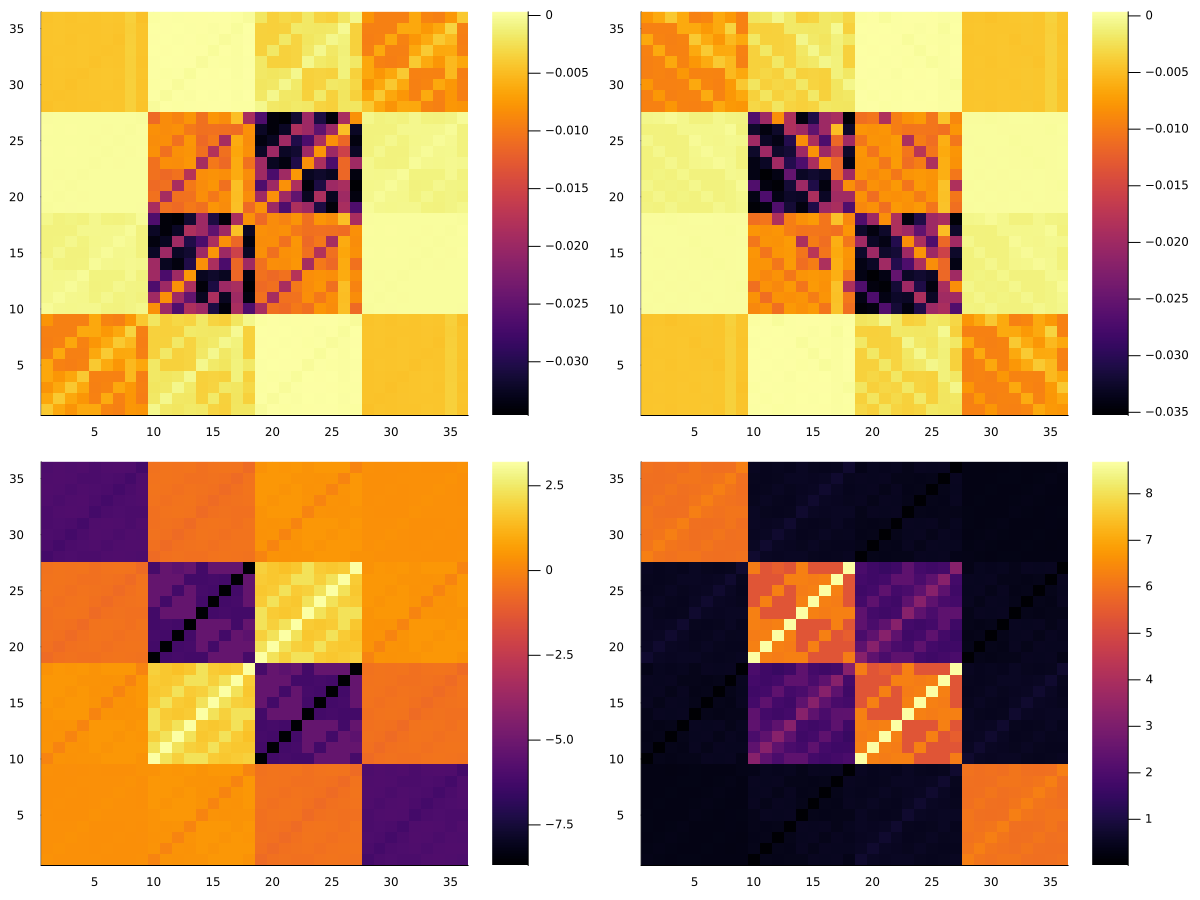

In [36]:
p1 = heatmap(real(Γs_ladder1))
p2 = heatmap(real(Γs_ladder1_G))
p3 = heatmap(real(Γs_ladder_test2))
p4 = heatmap(abs.(Γs_ladder1 .- Γs_ladder_test2))
plot(p1, p2, p3, p4, size=(1200,900))

max imag 5.789488421574779e-9, 6.177307438900086e-9


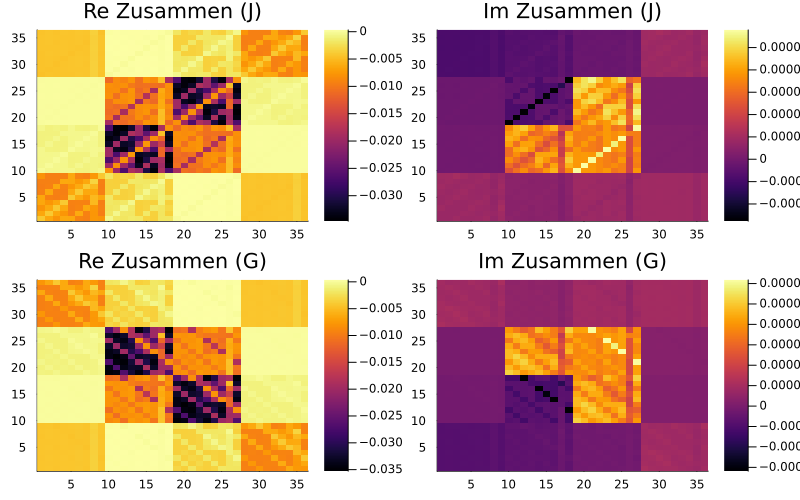

In [114]:
p1 = heatmap(real(Γs_ladder1), title="Re Zusammen (J)")
p2 = heatmap(imag(Γs_ladder1), title="Im Zusammen (J)")
p3 = heatmap(real(Γs_ladder1_G), title="Re Zusammen (G)")
p4 = heatmap(imag(Γs_ladder1_G), title="Im Zusammen (G)")
test_imag_1 = maximum(abs.(imag(Γs_ladder1)))
test_imag_1G = maximum(abs.(imag(Γs_ladder1_G)))
println("max imag $test_imag_1, $test_imag_1G")
plot(p1, p2, p3, p4, size=(800,500))

max imag 5.522761716238473e-9, 5.744853794064417e-9


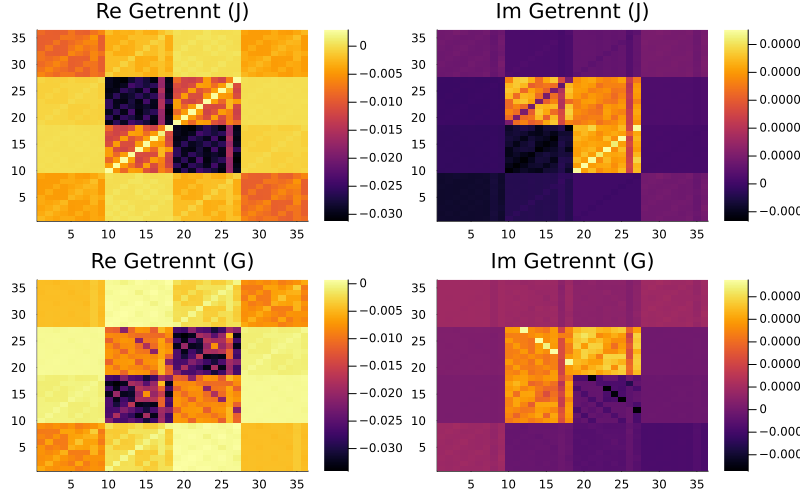

In [115]:
p1 = heatmap(real(Γs_ladder2), title="Re Getrennt (J)")
p2 = heatmap(imag(Γs_ladder2), title="Im Getrennt (J)")
p3 = heatmap(real(Γs_ladder2_G), title="Re Getrennt (G)")
p4 = heatmap(imag(Γs_ladder2_G), title="Im Getrennt (G)")
test_imag_2 = maximum(abs.(imag(Γs_ladder2)))
test_imag_2G = maximum(abs.(imag(Γs_ladder2_G)))
println("max imag $test_imag_2, $test_imag_2G")
plot(p1, p2, p3, p4, size=(800,500))

In [116]:
using LinearAlgebra
@time ev1,vv1 = eigen(Γs_ladder1, sortby=x->real(x))#Γs_ladder3)
@time ev2,vv2 = eigen(Γs_ladder2, sortby=x->real(x));#Γs_ladder4)
@time evNew,vvNew = eigen(Γ_ladder_ud_test, sortby=x->real(x));
evNewTest,vvNewTest = eigen(Γs_ladder_test2, sortby=x->real(x));

#@time ev4_2,vv4_2 = eigen(real.(Γs_ladder4)); #Γs_ladder4));

  0.360986 seconds (435.46 k allocations: 28.608 MiB, 99.25% compilation time)
  0.346589 seconds (435.46 k allocations: 28.622 MiB, 99.39% compilation time)
  0.344633 seconds (435.47 k allocations: 28.758 MiB, 98.91% compilation time)


In [117]:
@time ev1_G,vv1_G = eigen(Γs_ladder1_G, sortby=x->real(x))#Γs_ladder3)
@time ev2_G,vv2_G = eigen(Γs_ladder2_G, sortby=x->real(x));

  0.359923 seconds (435.46 k allocations: 28.611 MiB, 99.36% compilation time)
  0.333769 seconds (435.48 k allocations: 28.623 MiB, 99.36% compilation time)


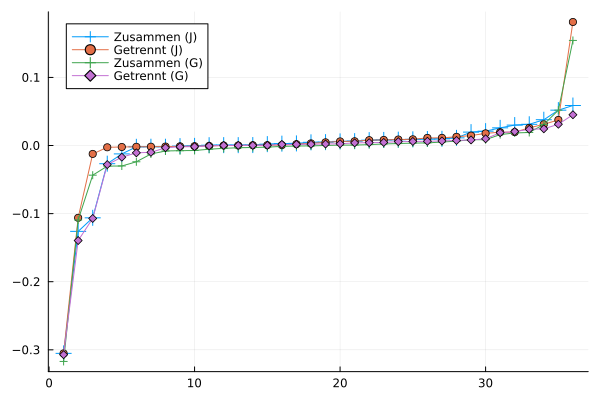

In [118]:
plot(real(ev1), markershape=:auto, label="Zusammen (J)", markersize=8)
plot!(real(ev2), markershape=:auto, label="Getrennt (J)")
plot!(real(ev1_G), markershape=:auto, label="Zusammen (G)")
#plot!(real(evNewTest), label="Test2")
plot!(real(ev2_G), markershape=:auto, label="Getrennt (G)")
#plot!(real(evNew), markershape=:auto, label="Test", size=(1400,1000))

In [119]:
ev1_t = round.(real(ev1),digits=5)
ev2_t = round.(real(ev2),digits=5)
ev1G_t = round.(real(ev1_G),digits=5)
ev2G_t = round.(real(ev2_G),digits=5)
println("similarity smallest EV: ")
show(stdout, "text/plain", collect(zip(ev1_t, ev1G_t, ev2_t, ev2G_t))[1:5])
println("\nsimilarity largest EV: ")
show(stdout, "text/plain", collect(zip(ev1_t, ev1G_t, ev2_t, ev2G_t))[end-5:end])

similarity smallest EV: 
5-element Vector{NTuple{4, Float64}}:
 (-0.30524, -0.31705, -0.30524, -0.30714)
 (-0.12611, -0.10932, -0.10618, -0.13954)
 (-0.10618, -0.04359, -0.01234, -0.10712)
 (-0.02668, -0.03027, -0.00261, -0.02801)
 (-0.01234, -0.03006, -0.00219, -0.01715)
similarity largest EV: 
6-element Vector{NTuple{4, Float64}}:
 (0.02593, 0.01606, 0.01954, 0.01887)
 (0.03, 0.01841, 0.01968, 0.02044)
 (0.03117, 0.01915, 0.02593, 0.02379)
 (0.03786, 0.03092, 0.03117, 0.0245)
 (0.05193, 0.05189, 0.03758, 0.03125)
 (0.05873, 0.15424, 0.18136, 0.04517)

  0.267129 seconds (342.10 k allocations: 22.553 MiB, 99.17% compilation time)
  0.251655 seconds (342.12 k allocations: 22.657 MiB, 99.15% compilation time)
  0.253736 seconds (342.09 k allocations: 22.533 MiB, 98.74% compilation time)
  0.259383 seconds (342.09 k allocations: 22.532 MiB, 99.13% compilation time)


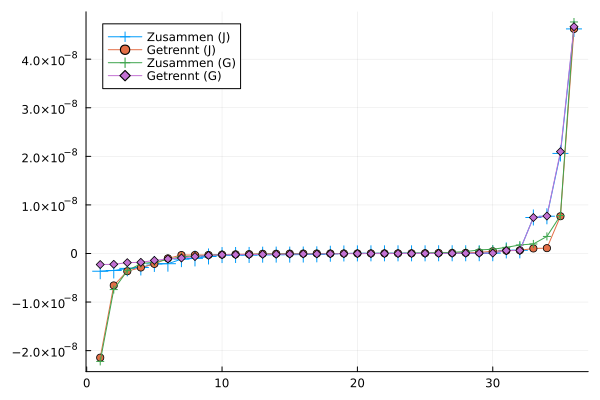

In [120]:
@time ev1,vv1 = eigen(Γs_ladder1, sortby=x->imag(x))#Γs_ladder3)
@time ev2,vv2 = eigen(Γs_ladder2, sortby=x->imag(x));
#@time evNew,vvNew = eigen(Γ_ladder_ud_test, sortby=x->imag(x));
@time ev1_G,vv1_G = eigen(Γs_ladder1_G, sortby=x->imag(x))#Γs_ladder3)
@time ev2_G,vv2_G = eigen(Γs_ladder2_G, sortby=x->imag(x));
p1 = plot(imag(ev1), markershape=:auto, label="Zusammen (J)", markersize=8)
plot!(imag(ev2), markershape=:auto, label="Getrennt (J)")
plot!(imag(ev1_G), markershape=:auto, label="Zusammen (G)")
plot!(imag(ev2_G), markershape=:auto, label="Getrennt (G)")
#plot!(imag(evNew), markershape=:auto, label="Test")

### Internal Test

In [38]:
λ_max,λ_min = calc_λmax_linEliashberg(bubble, χm, χd, γm, γd, lDGAhelper, env; GF=lDGAhelper.gLoc, max_Nk=4)

Brute force checking for possible sub-samples. This needs to be rewritten
┌ Warning: TODO: currently calculating two versions of Γ_pp, until Fm_{k'-k} question is resolved
└ @ LadderDGA ~/Codes/LadderDGA.jl/src/LinearizedEliashberg.jl:111


(ComplexF64[0.17861302743458748 - 5.481642894839955e-8im], ComplexF64[-0.4583784931575655 - 2.0140210535970033e-7im])

In [39]:
λ₀ = calc_λ0(bubble, lDGAhelper)
res_dm = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper; fit_μ=true)

DBG: NOT using diagonal terms in λ₀


λ-correction (type: dm), converged
λm = 0.007291685213018235, λd = 0.1007477550264544
trace: 
DataFrames.DataFrame[]


## Matrix Free Tests

In [ ]:
    minus_ν_minus_νp = trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn     
    νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1

    ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
        
    if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,lDGAhelper.sP)

      for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            G_mG = Gνk_Gmνmk[νpi, kpi];
            qi_k_minus_kp       = qi_access_k_minus_kp[ki,kpi];
            qi_kp_minus_k       = qi_access_kp_minus_k[ki,kpi];
            qi_minus_k_minus_kp = qi_access_minus_k_minus_kp[ki,kpi]

            Γs_ladder1_G[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(   Fph_ladder_updo[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G]
                                                                                  .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)

In [ ]:
using LinearAlgebra, Arpack, LinearMaps
using BenchmarkTools

N = 30
A = convert.(Float64, reshape(1:(N*N),N,N))
f(i,j) = 1.0*j .+ (N-1) .* (j .- 1) .+ (i .- 1)
f2(v) = map(i -> sum(v .* f(i,1:N)), 1:N)

A_mf = LinearMap{Float64}(f2,N)
vals1,vecs1 = eigs(A, which=:LM, nev=2, tol=1e-12, maxiter=500)
vals2,vecs2 = eigs(A_mf, which=:LM, nev=2, tol=1e-12, maxiter=500)
println("CHECK: ", all(isapprox.(vals1,vals2))))
# execute once for precompilation
@benchmark vals1,vecs1 = eigs($A, which=:LM, nev=2, tol=1e-12, maxiter=500)
@benchmark vals2,vecs2 = eigs($A_mf, which=:LM, nev=2, tol=1e-12, maxiter=500)

In [257]:
#Γs_ladder1 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
#fill!(Γs_ladder1, NaN + 1im * NaN)
function Γs_op(vec)
    ωi_pp  = sP.n_iω+1
    res = zeros(ComplexF64, length(vec))
    for (νi,νn) in enumerate(νnGrid)
      νi_pp  = νn + sP.n_iν+1;
      for (νpi,νpn) in enumerate(νnGrid)      
        minus_ν_minus_νp = -νn - νpn - 1     # - νn - νpn
        νpi_pp  = νpn + sP.n_iν+1;
    
        ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
        if freq_inbounds( ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G,lDGAhelper.sP)
          for (ki,k_vec) in enumerate(k_vecs)
            for (kpi,kp_vec) in enumerate(k_vecs)
                G_mG = Gνk_Gmνmk[νpi, kpi];
                qi_minus_k_minus_kp = qi_access_minus_k_minus_kp[ki,kpi]
                res[ki+length(k_vecs)*(νi-1)] += -vec[kpi+length(k_vecs)*(νpi-1)] * (   Fph_ladder_updo[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G]
                                                                     .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            end
          end
        else
          println("$νn / $νpn out of bounds")
        end 
      end
    end
    return real(res)
end

Γs_op (generic function with 1 method)

In [281]:
using LinearAlgebra, Arpack, LinearMaps
N_LM = νlen*klen

ev1_check, vv1_check = eigen(real(Γs_ladder1_G))

Γs_LM = LinearMap{Float64}(Γs_op, N_LM, issymmetric = false)
vals1,vecs1 = eigs(Γs_LM, which=:LR, nev=2, tol=0, maxiter=500)
vals2,vecs2 = eigs(Γs_ladder1_G, which=:LR, nev=2,tol=0, maxiter=500)

(ComplexF64[0.17558134347017051 - 5.425860521452204e-8im, 0.06044909922566642 - 8.34477484071678e-9im], ComplexF64[-0.04180619260905355 + 0.035364695874544945im 0.1690872404340022 + 0.2960501612870908im; -0.04526136099831723 + 0.038287483454053195im 0.1758908729127382 + 0.30796245820723983im; … ; 0.04526135711749214 - 0.03828748804905187im -0.1758908473175771 - 0.3079624728249977im; 0.04727483941900576 - 0.0399907282732912im -0.17877556775450515 - 0.3130132507352758im], 2, 1, 16, ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im])

In [1]:
sort(real(ev1_check))

LoadError: UndefVarError: `ev1_check` not defined

In [2]:
sort(real(vals1))

LoadError: UndefVarError: `vals1` not defined

In [3]:
sort(real(vals2))

LoadError: UndefVarError: `vals2` not defined